# 3 Degrees Of Freedome (DOF)

In [1]:
%matplotlib inline
import sympy as sym
import sympy.physics.mechanics as me
from sympy import init_printing
init_printing(use_latex='mathjax')

from pydy.system import System
import numpy as np
import matplotlib.pyplot as plt


<img src="3dof.png" width="400" align="left">

In [2]:
x0,y0,psi,x,y,beta,x,y,u,v,r,V = me.dynamicsymbols(r'x0 y0 \psi x y \beta x y u v r V')
m,Izz,t,x_cg = sym.symbols(r'm Izz t x_{cg}')

In [3]:
earth_frame = me.ReferenceFrame(name = 'E')
ship_frame = me.ReferenceFrame(name = 'S')
ship_frame.orient(parent = earth_frame,rot_type='Axis',amounts = (psi,earth_frame.z))
#ship_frame.set_ang_vel(otherframe=earth_frame,value = r*earth_frame.z)

In [4]:
ship_frame.dcm(otherframe=earth_frame)

⎡cos(\psi(t))   sin(\psi(t))  0⎤
⎢                              ⎥
⎢-sin(\psi(t))  cos(\psi(t))  0⎥
⎢                              ⎥
⎣      0             0        1⎦

In [5]:
O0 = me.Point('O0')
O0.set_vel(frame = earth_frame,value = 0)

O = me.Point('O')
#O.set_pos(otherpoint=O0,value = x0*earth_frame.x + y0*earth_frame.y)
O.set_pos(otherpoint=O0,value = x*ship_frame.x + y*ship_frame.y)

O.set_vel(frame = ship_frame,value = u*ship_frame.x + v*ship_frame.y)

O.v1pt_theory(otherpoint=O0,outframe=earth_frame,interframe=ship_frame)

⎛            d          ⎞       ⎛            d          ⎞
⎜u(t) - y(t)⋅──(\psi(t))⎟ s_x + ⎜v(t) + x(t)⋅──(\psi(t))⎟ s_y
⎝            dt         ⎠       ⎝            dt         ⎠

In [6]:
O.pos_from(O0)

x(t) s_x + y(t) s_y

In [7]:
O.vel(earth_frame).express(earth_frame)

⎛⎛            d          ⎞                ⎛            d          ⎞
⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅cos(\psi(t)) - ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅sin(\psi(t
⎝⎝            dt         ⎠                ⎝            dt         ⎠

  ⎞       ⎛⎛            d          ⎞                ⎛            d          ⎞
))⎟ e_x + ⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅sin(\psi(t)) + ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅
  ⎠       ⎝⎝            dt         ⎠                ⎝            dt         ⎠

            ⎞
cos(\psi(t))⎟ e_y
            ⎠

In [8]:
O.acc(earth_frame).express(earth_frame)

⎛  ⎛                                               2
⎜  ⎜⎛            d          ⎞ d                   d             d           d
⎜- ⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅──(\psi(t)) + x(t)⋅───(\psi(t)) + ──(\psi(t))⋅──
⎜  ⎜⎝            dt         ⎠ dt                   2            dt          dt
⎝  ⎝                                             dt

                 ⎞                ⎛
         d       ⎟                ⎜  ⎛            d          ⎞ d
(x(t)) + ──(v(t))⎟⋅sin(\psi(t)) + ⎜- ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅──(\psi(t)) - y
         dt      ⎟                ⎜  ⎝            dt         ⎠ dt
                 ⎠                ⎝

      2                                           ⎞             ⎞       ⎛⎛
     d             d           d          d       ⎟             ⎟       ⎜⎜⎛
(t)⋅───(\psi(t)) - ──(\psi(t))⋅──(y(t)) + ──(u(t))⎟⋅cos(\psi(t))⎟ e_x + ⎜⎜⎜u(t
      2            dt          dt         dt      ⎟             ⎟       ⎜⎜⎝
    dt                                            ⎠             ⎠    

In [20]:
CG = me.Point('CG')
CG.set_pos(O,value = x_cg*ship_frame.x)
CG.v2pt_theory(otherpoint=O,outframe=earth_frame,fixedframe=ship_frame)

CG.acc(earth_frame).express(earth_frame)

⎛⎛                                                                      2
⎜⎜  ⎛       d                         d          ⎞ d                   d
⎜⎜- ⎜x_{cg}⋅──(\psi(t)) + v(t) + x(t)⋅──(\psi(t))⎟⋅──(\psi(t)) - y(t)⋅───(\psi
⎜⎜  ⎝       dt                        dt         ⎠ dt                   2
⎝⎝                                                                    dt

                                      ⎞                ⎛         2
       d           d          d       ⎟                ⎜        d
(t)) - ──(\psi(t))⋅──(y(t)) + ──(u(t))⎟⋅cos(\psi(t)) - ⎜x_{cg}⋅───(\psi(t)) +
       dt          dt         dt      ⎟                ⎜         2
                                      ⎠                ⎝       dt

                                               2
⎛            d          ⎞ d                   d             d           d
⎜u(t) - y(t)⋅──(\psi(t))⎟⋅──(\psi(t)) + x(t)⋅───(\psi(t)) + ──(\psi(t))⋅──(x(t
⎝            dt         ⎠ dt                   2            dt          dt
    

In [21]:
kinematical_differential_equations = [u - x.diff(),
                                      v - y.diff(),
                                      r - psi.diff()]
coordinates = [x,y,psi,]
speeds = [u,v,r,]

In [22]:
kane = me.KanesMethod(earth_frame,coordinates, speeds,kinematical_differential_equations)

## Manoeuver derivatives

In [65]:
delta_R = sym.symbols('\delta_{R}')
eta = sym.symbols('\eta')

Xvv = sym.symbols('X_{vv}')
Xvr = sym.symbols('X_{vr}')
Xvveta = sym.symbols('X_{vv\eta}')
Xdd = sym.symbols('X_{\delta\delta}')
Xddetaeta = sym.symbols('X_{\delta\delta\eta\eta}')

# X
Xudot = sym.symbols('X_{\dot{u}}')
a_i = sym.symbols('a_{i}')
b_i = sym.symbols('b_{i}')
c_i = sym.symbols('c_{i}')
Xrr = sym.symbols('X_{rr}')
Xvv = sym.symbols('X_{vv}')
Xvr = sym.symbols('X_{vr}')
Xvveta = sym.symbols('X_{vv\eta}')
Xdeltadelta = sym.symbols('X_{\delta\delta}')
Xddetaeta = sym.symbols('X_{\delta\delta\eta\eta}')

# Y
Yvdot = sym.symbols('Y_{\dot{v}}')
Yrdot = sym.symbols('Y_{\dot{r}}')

Yv = sym.symbols('Y_{v}')
Yr = sym.symbols('Y_{r}')
Yvav = sym.symbols('Y_{v\abs{v}}')
Yvar = sym.symbols('Y_{v\abs{r}}')

Yveta = sym.symbols('Y_{v\eta}')
Yreta = sym.symbols('Y_{r\eta}')
Yvaveta = sym.symbols('Y_{v\abs{v}\eta}')

Ystar = sym.symbols('Y_{*}')
Ystareta = sym.symbols('Y_{*\eta}')

Ydelta = sym.symbols('Y_{\delta}')
Ydeltaar = sym.symbols('Y_{\delta\abs{r}}')
Ydeltaeta = sym.symbols('Y_{\delta\eta}')

# N
Nrdot = sym.symbols('N_{\dot{r}}')
Nvdot = sym.symbols('N_{\dot{v}}')

Nr = sym.symbols('N_{r}')
Nv = sym.symbols('N_{v}')
Nrar = sym.symbols('N_{r\abs{r}}')
Nvav = sym.symbols('N_{v\abs{v}}')
Nvar = sym.symbols('N_{v\abs{r}}')

Nreta = sym.symbols('N_{r\eta}')
Nveta = sym.symbols('N_{v\eta}')
Nvaveta = sym.symbols('N_{v\abs{v}\eta}')

Ndelta = sym.symbols('N_{\delta}')
Ndeltaar = sym.symbols('N_{\delta\abs{r}}')
Ndeltaeta = sym.symbols('N_{\delta\eta}')

Nstar = sym.symbols('N_{*}')
Nstareta = sym.symbols('N_{*\eta}')



In [67]:
Fx = (
Xudot*u.diff() 
+ (a_i + b_i*eta + c_i*eta**2)
+ Xrr*r**2 + Xvv*v**2 + Xvr*v*r
+ Xvveta*v**2*(eta-1)
+ Xdeltadelta*delta_R**2
+ Xddetaeta*(delta_R**2*eta**2)   
)    

 
Fx

                                   2     2                              2     
X_{\delta\delta\eta\eta}⋅\delta_{R} ⋅\eta  + X_{\delta\delta}⋅\delta_{R}  + X_
                                                                              

          d                  2                                                
{\dot{u}}⋅──(u(t)) + X_{rr}⋅r (t) + X_{vr}⋅r(t)⋅v(t) + X_{vv\eta}⋅(\eta - 1)⋅v
          dt                                                                  

2              2          2                           
 (t) + X_{vv}⋅v (t) + \eta ⋅c_{i} + \eta⋅b_{i} + a_{i}
                                                      

In [68]:
forces = Fx*ship_frame.x




mass = me.Particle('m', CG, m)

In [24]:
inertia_dyadic = me.inertia(ship_frame, ixx = 0, iyy = 0, izz = Izz)
inertia_dyadic

Izz s_z⊗s_z

In [69]:
inertia = (inertia_dyadic, CG)

In [70]:
ship = me.RigidBody('ship',masscenter=CG,frame = ship_frame,mass = m,inertia=inertia)

In [71]:
fr, frstar = kane.kanes_equations(bodies = [ship],loads = [(O, forces)])

In [72]:
M = kane.mass_matrix_full 
M

⎡1  0  0     0             0                          0                 ⎤
⎢                                                                       ⎥
⎢0  1  0     0             0                          0                 ⎥
⎢                                                                       ⎥
⎢0  0  1     0             0                          0                 ⎥
⎢                                                                       ⎥
⎢0  0  0     m             0                       -m⋅y(t)              ⎥
⎢                                                                       ⎥
⎢0  0  0     0             m                  m⋅(x_{cg} + x(t))         ⎥
⎢                                                                       ⎥
⎢                                             ⎛               2    2   ⎞⎥
⎣0  0  0  -m⋅y(t)  m⋅(x_{cg} + x(t))  Izz + m⋅⎝(x_{cg} + x(t))  + y (t)⎠⎦

In [73]:
f = kane.forcing_full
f

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                       2     
⎢                                    X_{\delta\delta\eta\eta}⋅\delta_{R} ⋅\eta
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣-m⋅(x_{cg} + x(t))⋅((-r(t)⋅y(t) + u(t))⋅r(t) + r(t)

In [74]:
(M.inv() * f)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢          3                                                                  
⎢         m ⋅(x_{cg} + x(t))⋅((-r(t)⋅y(t) + u(t))⋅r(t) + r(t)⋅u(t))⋅y(t)      
⎢─────────────────────────────────────────────────────────────────────────────
⎢   3                2     ⎛   2  2        ⎛        ⎛               2    2   ⎞
⎢- m ⋅(x_{cg} + x(t))  + m⋅⎝- m ⋅y (t) + m⋅⎝Izz + m⋅⎝(x_{cg} + x(t))  + y (t)⎠
⎢                                                                             
⎢                       2                 ⎛         

## Create a PyDy system

In [105]:
properties = {
    m:1,
    Izz:1,

}

controls = {
delta_R:0.0,
eta:1,
}

derivatives_x = {
    
    Xdeltadelta:0.1,
}

derivatives_y = {
    
}

derivatives_n = {
    
}

derivatives = {}
derivatives.update(derivatives_x)

constants = {}
constants.update(properties)
constants.update(controls)


initial_conditions = {
    x:0,
    y:0,
    psi:0,
    u:0,
    v:0,
    r:0,  
}

times = np.linspace(0,10,100)

sys = System(kane,constants=constants,initial_conditions=initial_conditions,times = times)

In [106]:
result = sys.integrate()

Text(0,0.5,'x [m]')

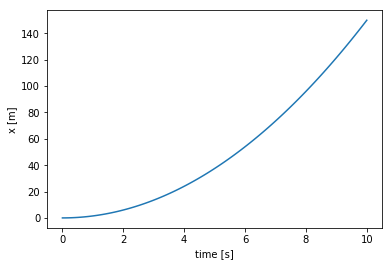

In [107]:
fig,ax = plt.subplots()
ax.plot(times,result[:,0])
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')

In [78]:
p = O.pos_from(O0).express(earth_frame)
x0_ = p.dot(ship_frame.x)
x0_

(x(t)⋅sin(\psi(t)) + y(t)⋅cos(\psi(t)))⋅sin(\psi(t)) + (x(t)⋅cos(\psi(t)) - y(
t)⋅sin(\psi(t)))⋅cos(\psi(t))

In [79]:
y0_ = p.dot(ship_frame.y)
y0_

(x(t)⋅sin(\psi(t)) + y(t)⋅cos(\psi(t)))⋅cos(\psi(t)) - (x(t)⋅cos(\psi(t)) - y(
t)⋅sin(\psi(t)))⋅sin(\psi(t))

In [80]:
f_x0 = sym.lambdify((x,y,psi,t),x0_,"numpy")
f_y0 = sym.lambdify((x,y,psi,t),y0_,"numpy")


In [81]:
x0_sim = f_x0(result[:,0],result[:,1],result[:,2],times)

Text(0,0.5,'x0 [m]')

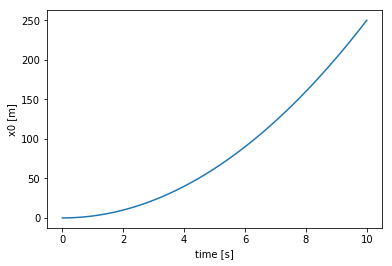

In [82]:
fig,ax = plt.subplots()
ax.plot(times,x0_sim)
ax.set_xlabel('time [s]')
ax.set_ylabel('x0 [m]')

In [83]:
y0_sim = f_y0(result[:,0],result[:,1],result[:,2],times)

Text(0,0.5,'y0 [m]')

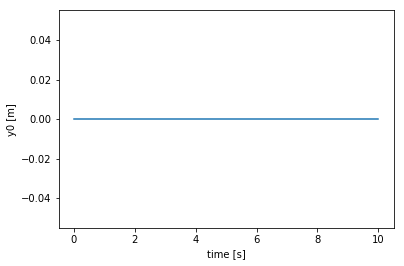

In [84]:
fig,ax = plt.subplots()
ax.plot(times,y0_sim)
ax.set_xlabel('time [s]')
ax.set_ylabel('y0 [m]')

Text(0,0.5,'x0 [m]')

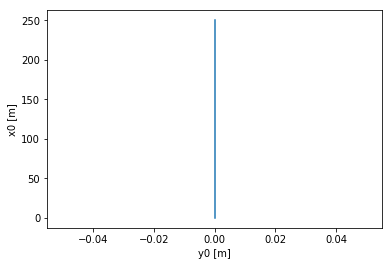

In [85]:
fig,ax = plt.subplots()
ax.plot(y0_sim,x0_sim)
ax.set_xlabel('y0 [m]')
ax.set_ylabel('x0 [m]')
